In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv("/kaggle/input/iris/Iris.csv")   

# Features and target
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Function to train & evaluate KNN
# -----------------------------
def evaluate_knn(k):
    print(f"\n==========================")
    print(f"      KNN Results (k={k})")
    print(f"==========================")

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred, average='weighted')
    rec = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')

    print(f"Accuracy:   {acc:.3f}")
    print(f"Precision:  {prec:.3f}")
    print(f"Recall:     {rec:.3f}")
    print(f"F1 Score:   {f1:.3f}")

    print("\nClassification Report:")
    print(classification_report(y_test, pred))

# -----------------------------
# Run models
# -----------------------------
evaluate_knn(3)
evaluate_knn(7)



      KNN Results (k=3)
Accuracy:   1.000
Precision:  1.000
Recall:     1.000
F1 Score:   1.000

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


      KNN Results (k=7)
Accuracy:   0.967
Precision:  0.969
Recall:     0.967
F1 Score:   0.966

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted 

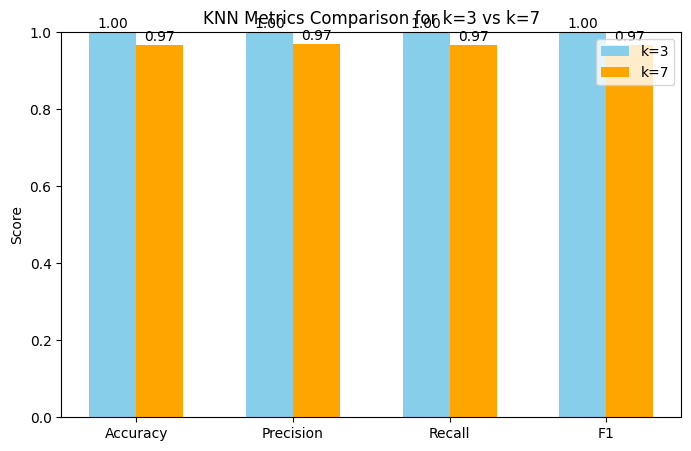

In [13]:

# -----------------------------
# Visualization: Accuracy Comparison
# -----------------------------
import matplotlib.pyplot as plt

# -----------------------------
# Store metrics for plotting
# -----------------------------
metrics = {'k=3': {}, 'k=7': {}}

# Evaluate k=3
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
metrics['k=3']['Accuracy'] = accuracy_score(y_test, pred3)
metrics['k=3']['Precision'] = precision_score(y_test, pred3, average='weighted')
metrics['k=3']['Recall'] = recall_score(y_test, pred3, average='weighted')
metrics['k=3']['F1'] = f1_score(y_test, pred3, average='weighted')

# Evaluate k=7
model7 = KNeighborsClassifier(n_neighbors=7)
model7.fit(X_train, y_train)
pred7 = model7.predict(X_test)
metrics['k=7']['Accuracy'] = accuracy_score(y_test, pred7)
metrics['k=7']['Precision'] = precision_score(y_test, pred7, average='weighted')
metrics['k=7']['Recall'] = recall_score(y_test, pred7, average='weighted')
metrics['k=7']['F1'] = f1_score(y_test, pred7, average='weighted')

# -----------------------------
# Visualization
# -----------------------------
labels = ['Accuracy','Precision','Recall','F1']
k3_values = [metrics['k=3'][m] for m in labels]
k7_values = [metrics['k=7'][m] for m in labels]

x = range(len(labels))
plt.figure(figsize=(8,5))
plt.bar([i-0.15 for i in x], k3_values, width=0.3, label='k=3', color='skyblue')
plt.bar([i+0.15 for i in x], k7_values, width=0.3, label='k=7', color='orange')
plt.xticks(x, labels)
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("KNN Metrics Comparison for k=3 vs k=7")
plt.legend()

# Add values on top of bars
for i, v in enumerate(k3_values):
    plt.text(i-0.15, v+0.01, f"{v:.2f}", ha='center')
for i, v in enumerate(k7_values):
    plt.text(i+0.15, v+0.01, f"{v:.2f}", ha='center')

plt.show()


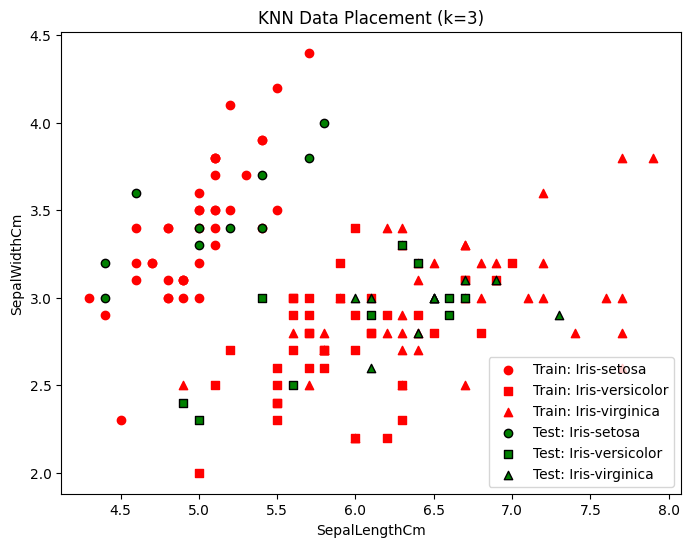

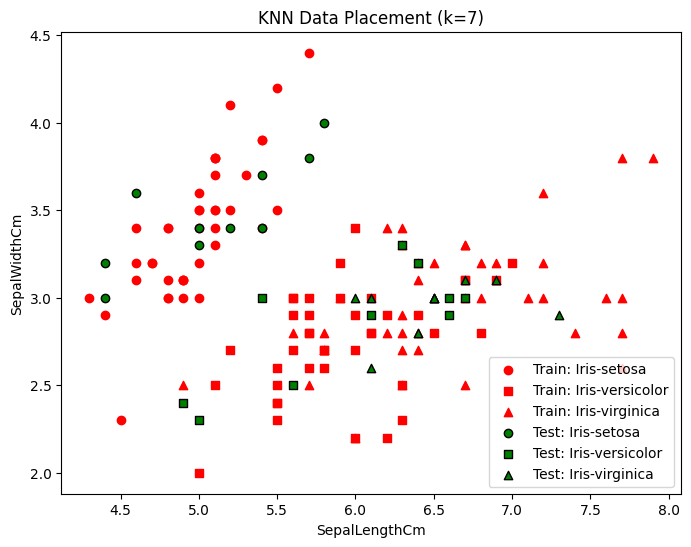

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Use only 2 features for 2D plot
X_plot = df[['SepalLengthCm','SepalWidthCm']].values
y_plot = df['Species']

# Encode species
le = LabelEncoder()
y_plot_encoded = le.fit_transform(y_plot)

# Train-test split
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(
    X_plot, y_plot_encoded, test_size=0.2, random_state=42, stratify=y_plot_encoded
)

# Colors
train_color = 'red'
test_color = 'green'
markers = ['o','s','^']

def plot_knn(X_train, X_test, y_train, y_test, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Plot training data
    plt.figure(figsize=(8,6))
    for cls in np.unique(y_train):
        plt.scatter(X_train[y_train==cls,0], X_train[y_train==cls,1], 
                    color=train_color, marker=markers[cls], label=f'Train: {le.inverse_transform([cls])[0]}')
    # Plot testing data
    for cls in np.unique(y_test):
        plt.scatter(X_test[y_test==cls,0], X_test[y_test==cls,1], 
                    color=test_color, marker=markers[cls], edgecolor='k', label=f'Test: {le.inverse_transform([cls])[0]}')
    
    plt.xlabel('SepalLengthCm')
    plt.ylabel('SepalWidthCm')
    plt.title(f'KNN Data Placement (k={k})')
    plt.legend()
    plt.show()

# Plot for k=3
plot_knn(X_train_plot, X_test_plot, y_train_plot, y_test_plot, k=3)

# Plot for k=7
plot_knn(X_train_plot, X_test_plot, y_train_plot, y_test_plot, k=7)
